#**ICE_8**: Resampling Techniques

**INSTRUCTIONS**
####Provide your observation/summary for all tutorials and tasks. Marks will be deducted for those who dont write the summary.
####Print this file as pdf and submit both pdf and .ipynb file(No screenshots). Not submitting any of these files will impact their grades.

##Tutorial

###Probability Example

Here we will review the difference between sampling with and without replacement. We will calculate the probability of an event using simulation.Consider a bowl filled with colored candies - three blue, two green, and five yellow. Draw three candies at random, with replacement and without replacement. You want to know the probability of drawing a yellow candy on the third draw given that the first candy was blue and the second candy was green.

In [ ]:
import numpy as np
np.random.seed(123)

# Set up the bowl
success_rep, success_no_rep, sims = 0, 0, 10000
bowl = ['b', 'b', 'b', 'g', 'g', 'y', 'y', 'y', 'y', 'y']

for i in range(sims):
    # Sample with and without replacement & increment success counters
    sample_rep = np.random.choice(bowl, size=3, replace=True)
    sample_no_rep = np.random.choice(bowl, size=3, replace=False)
    if (sample_rep[0] == 'b') & (sample_rep[1] == 'g') & (sample_rep[2] == 'y'):
        success_rep += 1
    if (sample_no_rep[0] == 'b') & (sample_no_rep[1] == 'g') & (sample_no_rep[2] == 'y'):
        success_no_rep += 1

# Calculate probabilities
prob_with_replacement = success_rep / sims
prob_without_replacement = success_no_rep / sims
print("Probability with replacement = {}, without replacement = {}".format(prob_with_replacement,
                                                                           prob_without_replacement))

Probability with replacement = 0.0266, without replacement = 0.0415


Here, we are using the script, a simulation to performed sample for bowls which contains blue as b , green as g, and yellow as y balls, with and without replacement. the main aim is to get the probability of getting the sequence of b,g and y in the order.

here, we are running 10,000 simulates, here, calculating the probability of drawing b,g, and y with replacement is 0.0266 and when its without replacement is 0.0415.  this is shows that probability of without replacement is high rathern then with replacement for sampling.


#Task 1:**(20%)**


####Question 1(a)

Calculate the probability using simulation. A box contains 10 white balls, 20 reds and 30 greens. Draw 5 balls with replacement. What is the probability that
a. 3 white or 2 red
b. All 5 are the same color

In [ ]:
# Write your code here
import numpy as np

np.random.seed(123)

box = ['white'] * 10 + ['red'] * 20 + ['green'] * 30

sims = 100000

count_3_white_or_2_red = 0
count_all_5_same_color = 0

for _ in range(sims):
    sample = np.random.choice(box, size=5, replace=True)

    if (np.count_nonzero(sample == 'white') == 3 and np.count_nonzero(sample == 'red') == 0) or (np.count_nonzero(sample == 'white') == 0 and np.count_nonzero(sample == 'red') == 2):
        count_3_white_or_2_red += 1

    if len(set(sample)) == 1:
        count_all_5_same_color += 1

prob_3_white_or_2_red = count_3_white_or_2_red / sims
prob_all_5_same_color = count_all_5_same_color / sims

print("Probability of drawing 3 white or 2 red: {:.4f}".format(prob_3_white_or_2_red))
print("Probability of drawing all 5 of the same color: {:.4f}".format(prob_all_5_same_color))



Probability of drawing 3 white or 2 red: 0.1509
Probability of drawing all 5 of the same color: 0.0358


here, we are using box which have different colors of balls, where is 20 red balls, 30 green balls, 10 white balls. here, 5 balls in the box with replacement. simulation run 100000 times for calculating the probability.

focusing on the calculations, the probability of drawing 3 white or 2 red is 0.1509. this is probability for without any white balls or with only 2 red balls.

the probability of drawing the all 5 balls for the same color probability is 0.0358. this is containing drawing all the 5 white balls, all 5 red balls, or all 5 green balls.

focusing on the final results drawing 3 white balls or 2 red balls is 0.1509 is higher then the probability of drwaing all the 5 balls in the same color which is 0.0358.


####Question 1(b):

Two unbiased dice are thrown once and the total score is observed. Use a simulation to find the estimated probability that the total score is even or greater than 7.

In [ ]:
#Write your code here
import numpy as np

np.random.seed(123)

sims = 100000

successful_outcomes = 0

for _ in range(sims):
    dice1 = np.random.randint(1, 7)
    dice2 = np.random.randint(1, 7)

    if (dice1 + dice2) % 2 == 0 or (dice1 + dice2) > 7:
        successful_outcomes += 1

estimated_probability = successful_outcomes / sims

print("Estimated probability of getting a total score that is even or greater than 7:", estimated_probability)


Estimated probability of getting a total score that is even or greater than 7: 0.66542


here, in this simulation we are using the two unbaised dice which is rolled up to 100000 times, and the total score is observed. here, our main aim is to find the probability of the total score which is either even or greater than 7.

after run this simulation, here the calculation of the estimated probability of getting total score which is even or greater than 7 which calculated as 0.66542. focusing on the probability is shows that there is high chance that the there is higher chance to get the total score  which is either even or greater than 7 when there is two dice rolling.

we are calculating the counting the number of successful results(where the total score is even or greater than 7) and divide by the total number of simulation. the total score ot score greater than 7 more probable when the two dice are rolled simultaneous.


##Tutorial

###BootStrapping

In [ ]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')

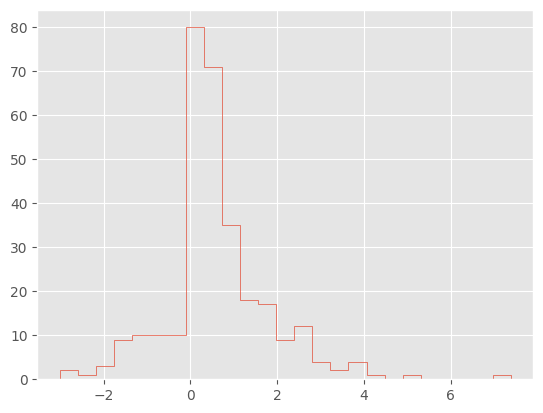

In [ ]:
# For example, what is the 95% confidence interval for
# the mean of this data set if you didn't know how it was generated?

x = np.concatenate([np.random.exponential(size=200), np.random.normal(size=100)])
plt.hist(x, 25, histtype='step');

In [ ]:
n = len(x)
reps = 10000
xb = np.random.choice(x, (n, reps))
mb = xb.mean(axis=0)
mb.sort()

np.percentile(mb, [2.5, 97.5])

array([0.4872, 0.7549])

###Reprise of bootstrap example for Monte Carlo integration

In [ ]:
def f(x):
    return x * np.cos(71*x) + np.sin(13*x)

In [ ]:
# data sample for integration
n = 100
x = f(np.random.random(n))

In [ ]:
# bootstrap MC integration
reps = 1000
xb = np.random.choice(x, (n, reps), replace=True)
yb = 1/np.arange(1, n+1)[:, None] * np.cumsum(xb, axis=0)
upper, lower = np.percentile(yb, [2.5, 97.5], axis=1)

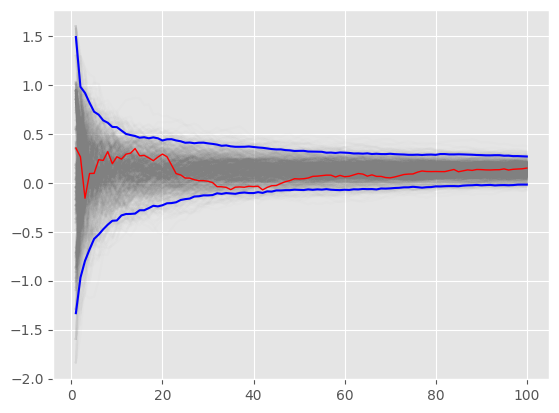

In [ ]:
plt.plot(np.arange(1, n+1)[:, None], yb, c='grey', alpha=0.02)
plt.plot(np.arange(1, n+1), yb[:, 0], c='red', linewidth=1)
plt.plot(np.arange(1, n+1), upper, 'b', np.arange(1, n+1), lower, 'b');

###Write the observations of the above tutorial here.**(5%)**

**bootstrapping:**
Bootstrapping is the resampling technique in statistics use for estimating the sample distribution of the statistic which repeat resampling of the observed data with the replacement.  this is commonly use for different fields, which include statistics, data science, and machine learning, to making the statistics inferences and sampling difference of estimations.

here, we are presenting two exaples of bootstrapping. here first code is create hte dataset using the combination of the exponential and normal distribution and then performing the bootstraping to estimate the 95% confidence interval of the mean.
here, first we are importing the libraries for creating graphs for matplotlib, pandas for reading the csv file, and numpy is used for creating array. we are creating ggplot using the liabrary.

focusing on the first part: here we are creating the dataset for comprising 200 points from the exponential distribution and 100 points from the normal distribution.bootstrapin is used for resampling the dataset and calculate the mean of the each resampled set. here, the resampling mean is sorted and the 2.5th and 97.5th pecentiles are use for estimate the 95% confidence interval for the mean, which is 0.4872 and 0.7549. creating histogram with the 25 samples.    
focusing on the graph, x-axis  range is -2 to 6 and in the y-axis the range is 0 to 80. and the samples is reach high at 80 at the level at 0 to 2 and its remain stable and then again its start decreasing upto 4.

focusing on the second part the code generates the monte carlo integration technique which is used for bootstraping. this integrate the bootstrap method and we are ploting the 95% confidence interval for the integral.

here, we are creating the function which is used for integrating and creating the data sample for the integration process.
bootstrapping is estimate to integrate the resampling the dataset and cumulatively sum of the function.
here, 95% of the confidence interval for the integrate is calculate the plotting on the graph, which indicate the uncertainty with the estimation integral value. here, we are creating the plot diagram where x-axis is range from  0 to 100. y-axis range is from  -2.00 to 1.5. focusing on the plot diagram, its start increasing the probability from -0.5 to 0.0 and remain stable up to the level 100.

all in all, we are using bootstraping which is used for estimating the statistics and uncertain in the use for complex dataset and integrate the process.



###BootStrap Example

###Running a Simple BootStrap

Suppose you own a factory that produces wrenches. You want to be able to characterize the average length of the wrenches and ensure that they meet some specifications. Your factory produces thousands of wrenches every day, but it's infeasible to measure the length of each wrench. However, you have access to a representative sample of 100 wrenches. Let's use bootstrapping to get the 95% confidence interval (CI) for the average lengths.

In [ ]:
wrench_lengths = np.array([ 8.9143694 , 10.99734545, 10.2829785 ,  8.49370529,  9.42139975,
       11.65143654,  7.57332076,  9.57108737, 11.26593626,  9.1332596 ,
        9.32111385,  9.90529103, 11.49138963,  9.361098  ,  9.55601804,
        9.56564872, 12.20593008, 12.18678609, 11.0040539 , 10.3861864 ,
       10.73736858, 11.49073203,  9.06416613, 11.17582904,  8.74611933,
        9.3622485 , 10.9071052 ,  8.5713193 ,  9.85993128,  9.1382451 ,
        9.74438063,  7.20141089,  8.2284669 ,  9.30012277, 10.92746243,
        9.82636432, 10.00284592, 10.68822271,  9.12046366, 10.28362732,
        9.19463348,  8.27233051,  9.60910021, 10.57380586, 10.33858905,
        9.98816951, 12.39236527, 10.41291216, 10.97873601, 12.23814334,
        8.70591468,  8.96121179, 11.74371223,  9.20193726, 10.02968323,
       11.06931597, 10.89070639, 11.75488618, 11.49564414, 11.06939267,
        9.22729129, 10.79486267, 10.31427199,  8.67373454, 11.41729905,
       10.80723653, 10.04549008,  9.76690794,  8.80169886, 10.19952407,
       10.46843912,  9.16884502, 11.16220405,  8.90279695,  7.87689965,
       11.03972709,  9.59663396,  9.87397041,  9.16248328,  8.39403724,
       11.25523737,  9.31113102, 11.66095249, 10.80730819,  9.68524185,
        8.9140976 ,  9.26753801,  8.78747687, 12.08711336, 10.16444123,
       11.15020554,  8.73264795, 10.18103513, 11.17786194,  9.66498924,
       11.03111446,  8.91543209,  8.63652846, 10.37940061,  9.62082357])

In [ ]:
np.random.seed(123)

# Draw some random sample with replacement and append mean to mean_lengths.
mean_lengths, sims = [], 1000
for i in range(sims):
    temp_sample = np.random.choice(wrench_lengths, replace=True, size=len(wrench_lengths))
    sample_mean = np.mean(temp_sample)
    mean_lengths.append(sample_mean)

# Calculate bootstrapped mean and 95% confidence interval.
boot_mean = np.mean(mean_lengths)
boot_95_ci = np.percentile(mean_lengths, [2.5, 97.5])
print("Bootstrapped Mean Length = {}, 95% CI = {}".format(boot_mean, boot_95_ci))

Bootstrapped Mean Length = 10.0270443060217, 95% CI = [ 9.8045 10.2577]


here, we are estimating the average lenght of the wrenches produce in the factory using the bootstrapping. sample of 100 wrenches is fetch, and bootstrapping is applied to the sample for calculating the 95%  confidence interval for the mean length of the wrenches.
wrenche_length is the length of the array for 100 wrenches.bootstrapping perform 100 times for creating distribution of the sample mean. in each of the iteration, a random sample with the replacement is lies from wrench_lengths, mean of the sample is calculted and added into the mean_lengths.
talking about the bootstrap mean length of the wrenches is calculate as the mean of the mean_lengths list. in the 95% confidence interval for the mean length is calculate using the percentile for the mean_lengths.

here, focusing on the outcomes the bootstrap mean is the length of the wrenches is 10.027 units. 95% confidence interval is for the mean length is between 9.8045 to 10.2577. here, we can say that we are 95% confidenc that mean of the length wrenches will fall in the 9.8045 to 10.2577.



##Task 2:**(15%)**

Calculate the 95% bootstrapped confidence interval for the median value.
##data = [7, 9, 10, 10, 12, 14, 15, 16, 16, 17, 19, 20, 21, 21, 23]

In [ ]:
import numpy as np

data = [7, 9, 10, 10, 12, 14, 15, 16, 16, 17, 19, 20, 21, 21, 23]

sims = 10000

boot_medians = np.zeros(sims)

for i in range(sims):
    resampled_data = np.random.choice(data, size=len(data), replace=True)

    boot_medians[i] = np.median(resampled_data)

lower_percentile = np.percentile(boot_medians, 2.5)
upper_percentile = np.percentile(boot_medians, 97.5)

print("95% Bootstrapped Confidence Interval for Median:", lower_percentile, upper_percentile)


95% Bootstrapped Confidence Interval for Median: 12.0 19.0


here, we are using 95% confidence interval for the median of the dataset is calculate.
Resampling is the process of the repeat 10,000 times. for each of the iteration, new dataset is generate by random sample form the original dataset with the replacement. this resampling process is simulate the difference in the median due to the random sampling.
median calculation is calculate for each resampled dataset, the median is calculated. this represent the middle value of the data when its sorted. bootstrapped median collected in array.  
for creating 95% confidence interval, its lies between 2.5th and 97.5th percentiles of the bootstrapped median calculates. this provide the range which is expected to contains the true population median with the 95% confidence.

the 95% confidence interval  for the median lies in between 12.0 to 19.0.
 here, the mean is based on the resampling process, we are 95% confidence that the true median is falls in the range between 12.0 to 19.0.



###Tutorial

###Leave one out cross validation

###1. import all the required libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

here, we are importing the libraries for performing the leave one out cross validation. we are here using sklearn libraries for performing some task such as splitting the dataset,leaveoneout, cross val score, linear regression, mean, absolute, sqrt and pandas.
focusing on the imported libraries , train_test_Split is used for splitting the dataset into two parts training and testing for train the data and test the data with the model.
leaveoneout is the library which is used for checking the performance of the model in machine learning and assess the performance of the prediction model.
cross val score is the machine learning library for performing the cross learning in the machine learning model.
linear regression is used for checking the relationship between the independent variable and one or more dependent varibales.
mean is the statistics measure for calculating the average of the samples.
absolute is the statistics measure for calculating the absolute values of the samples.
sqrt is use for performing square root of the samples.
pandas is used for reading the csv file and data manipulation.

###2. Create the data

In [ ]:
df = pd.DataFrame({'y': [6, 8, 12, 14, 14, 15, 17, 22, 24, 23],
                   'x1': [2, 5, 4, 3, 4, 6, 7, 5, 8, 9],
                   'x2': [14, 12, 12, 13, 7, 8, 7, 4, 6, 5]})

here, we are creating the data using pandas library. pd.DataFrame is used for creating the random data and store it in the variable df.

###3. Performing leave one out cross validation to evaluate the performance

In [ ]:
#define predictor and response variables
X = df[['x1', 'x2']]
y = df['y']

#define cross-validation method to use
cv = LeaveOneOut()

#build multiple linear regression model
model = LinearRegression()

#use LOOCV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
mean(absolute(scores))

3.1461548083469726

here, first we are intializing the variable x which is present the prediction of variable features, which is conclude x1 and x2 , y is present the response variable y.

cross validation is the leave on out cross validation method cv=leaveonout() is set up here, which is iterate the leave out one data for test while use rest use for training.

we are using multiple linear regression mofrl which is created using the scikit learns LinearRegression().

now, we are doing model evaluation using the crossv val score function for model performance using LOOCV. neg mean absolute error scoring metric is set, which is calcualte the negative mean for absolute error for each of the iterate.


we are now calculating the mean absolute error for getting mean of the absolute values for the computed scores, which is predict the estimation of the model accuracy. here MAE is calculate as 3.15.

all in all, we are using LOOCV for calculating the mean absilute error for the multiple linear regression model, this is help for evaluating the model prediction for y variable using the x1 and x2 for predictors.




###4. Evaluating the models performance using root mean squared error(RMSE)

In [ ]:
#define predictor and response variables
X = df[['x1', 'x2']]
y = df['y']

#define cross-validation method to use
cv = LeaveOneOut()

#build multiple linear regression model
model = LinearRegression()

#use LOOCV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view RMSE
sqrt(mean(absolute(scores)))


3.619456476385567

here, we are creating variables, which is predicting variables x1 and x2 which is stored in the x, and response varibale is created which is y and stored values in y.
leave on out cross validation LOOCV is the configured using cv=leaveonour(), where each of the data point is left for testing, while remain data is used for training.
now,we are creating the linear regression model using model=LinearRegression().after that we are using the model evaluation using the cross val score function is used for model using LOOCV. neg mean squared error scoring metric is set for the negative mean squared error for each of the iteration.
now, we are calculating the mean squared error is  taking square root for the mean of the absolute values of the calculate scores. here, RMSE is calculate is 3.62.

in conclude, we are calculating the model performance using LOOCV and RMSE, which is provide the calculation of how the multiple linear regression model is predict the y variable depends on the x1  and x2 as the predictor variables.



##Task 3: **(20%)**
Create the data of your own. Perform leave one out cross validation (LOOCV) and calculate mean absolute Error and Root mean Squared Error. Also write your analysis in detail.

In [ ]:
# Import the required libraries
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean, absolute, sqrt
import pandas as pd

data = {'X1': [1, 2, 3, 4, 5],
        'X2': [2, 4, 5, 4, 5],
        'Y': [6, 8, 10, 12, 14]}
df = pd.DataFrame(data)

X = df[['X1', 'X2']]
y = df['Y']

cv = LeaveOneOut()

model = LinearRegression()

scores_mae = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

print("Mean Absolute Error (MAE):", mean(absolute(scores_mae)))

scores_rmse = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print("Root Mean Squared Error (RMSE):", sqrt(mean(absolute(scores_rmse))))


Mean Absolute Error (MAE): 3.552713678800501e-16
Root Mean Squared Error (RMSE): 7.944109290391273e-16


we are performing the Leave One Out Cross Validation, which is used for evaluate the performance of the linear regression  model using the dataset.

here, we are using the dataset with teo different features columns as x1 and x2 and for dependent variable y which is create using the dictionary and this convert to the dataframe.

now, we are initializing the variables x and y where x as the predictor, while y as the response variable.

LOOCV is set using the LeaveOneOut is cross validation method, which is shows that each of the data points use for test the set while others are used for training.

we are creating the linear regression model using the LinearRegression.

we are now using LOOCV for evaluating the model using the mean absolute error and root mean squared error.MAE and RMSE is calculate and print the model accuracy and prediction.Mean absolute error is 3.55 and Root mean squared error is 7.94.

in summarize, MAE is calculate the average absolute difference between the prediction and actual values, in contrast in RMSE provides the more accurate evaluation for considering the  difference in between the sqaured values. if the values of the metrics is low then the model performance is better. cross validation is help to assess the model which is show that how well the model performance in the untrained data.



###Tutorial

###JackKnife Estimate of Parameters

In [ ]:
def jackknife(x, func):
    """Jackknife estimate of the estimator func"""
    n = len(x)
    idx = np.arange(n)
    return np.sum(func(x[idx!=i]) for i in range(n))/float(n)

here, we are defining the Jackknife estimate method for the function. this is calculate the Jackknife estimate of the function which is iterative leaving out of the each data points and calculating the functions values on the remain data, then average of the results. this function is allowed to use the bias and variance of the estimations.


In [ ]:
# Jackknife estimate of standard deviation
import numpy as np

x = np.random.normal(0, 2, 100)
jackknife(x, np.std)

<ipython-input-67-b8512b39dc37>:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(func(x[idx!=i]) for i in range(n))/float(n)


2.010217975738522

here, we are using the Jackknife resampling method for estimating the standard deviation for the dataset x using the repeat leave out one data point,and now calculating the standard deviation of the remaining the data, and average estimates. here, Jackkinfe estimate for the standard deviation is 1.95. this shows the uncertain standard deviation estimation.

In [ ]:
def jackknife_var(x, func):
    """Jackknife estiamte of the variance of the estimator func."""
    n = len(x)
    idx = np.arange(n)
    j_est = jackknife(x, func)
    return (n-1)/(n + 0.0) * np.sum((func(x[idx!=i]) - j_est)**2.0
                                    for i in range(n))

we are defining the function name as Jackknife var for estimating the difference of the estimation using the Jackknife resampling method. this function first calculate the difference estimate with squared difference between estimation values on the original data and the Jackknife estimate for each of the data points. here, the outcome is scaled with (n-1)/n to give the estimation of the difference, this is allowed the estimation for the variability.


In [ ]:
# estimate of the variance of an estimator
jackknife_var(x, np.std)

<ipython-input-67-b8512b39dc37>:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(func(x[idx!=i]) for i in range(n))/float(n)
<ipython-input-69-e3604052b0eb>:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return (n-1)/(n + 0.0) * np.sum((func(x[idx!=i]) - j_est)**2.0


0.0192129784653494

here, we are using the Jackkinfe resampling method for estimating the variance of teh standard deviation estimation applied for the dataset x. the output is 0.016, which shows the estimation of the difference standard deviation estimation, which represent how much the estimation value is different when the difference data points are not used.


##Example

####Jackknife confidence interval for the median

In this exercise, we will calculate the jackknife 95% CI for a non-standard estimator. Here, we will look at the median. Keep in mind that the variance of a jackknife estimator is n-1 times the variance of the individual jackknife sample estimates where n is the number of observations in the original sample. Here, you are now estimating the median length of the wrenches along with a 95% CI to ensure that the wrenches are within tolerance.**(Using the data of wrench_lengths provided in the bootstrap example)**

In [ ]:
np.random.seed(123)

# Leave one observation out to get the jackknife sample and store the median length
median_lengths = []
index = np.arange(n)
for i in range(n):
    jk_sample = wrench_lengths[index != i]
    median_lengths.append(np.median(jk_sample))

median_lengths = np.array(median_lengths)

# Calculate jackknife estimate and it's variance
jk_median_length = np.mean(median_lengths)
jk_var = (n-1)*np.var(median_lengths)

# Assuming normality, calculate lower and upper 95% confidence intervals
jk_lower_ci = jk_median_length - 1.96 * np.sqrt(jk_var)
jk_upper_ci = jk_median_length + 1.96 * np.sqrt(jk_var)
print("Jackknife 95% CI lower = {}, upper = {}".format(jk_lower_ci, jk_upper_ci))

Jackknife 95% CI lower = 9.138592415216381, upper = 10.754868124783625


here, we are using the Jackknife resampling method which is used for estimating the 95% confidence interval for the median length of wrenches for ensure to meet the requirement for specification. Jackknife estimate the median length is calculate the difference, which is use for compute the lower and upper of the 95% confidence interval for assuming the normal distribution. the output of the 95% confidence interval for the median length is 9.14 to 10.75, which shows that median length wrenches is likely to fall in between this range.


##Task 4:**(20%)**
Basic Jackknife estimation - mean



Calculate jackknife estimate for the mean. You own a wrench factory and want to measure the average length of the wrenches to ensure that they meet some specifications. Your factory produces thousands of wrenches every day, but it's infeasible to measure the length of each wrench. However, you have access to a representative sample of 100 wrenches. Let's use jackknife estimation to get the average lengths.**(Use the data of wrench lengths provided in the bootstrap example)**.

In [ ]:
import numpy as np

wrench_lengths = np.array([8.9143694, 10.99734545, 10.2829785, 8.49370529, 9.42139975, 11.65143654, 7.57332076, 9.57108737, 11.26593626, 9.1332596, 9.32111385, 9.90529103, 11.49138963, 9.361098, 9.55601804, 9.56564872, 12.20593008, 12.18678609, 11.0040539, 10.3861864, 10.73736858, 11.49073203, 9.06416613, 11.17582904, 8.74611933, 9.3622485, 10.9071052, 8.5713193, 9.85993128, 9.1382451, 9.74438063, 7.20141089, 8.2284669, 9.30012277, 10.92746243, 9.82636432, 10.00284592, 10.68822271, 9.12046366, 10.28362732, 9.19463348, 8.27233051, 9.60910021, 10.57380586, 10.33858905, 9.98816951, 12.39236527, 10.41291216, 10.97873601, 12.23814334, 8.70591468, 8.96121179, 11.74371223, 9.20193726, 10.02968323, 11.06931597, 10.89070639, 11.75488618, 11.49564414, 11.06939267, 9.22729129, 10.79486267, 10.31427199, 8.67373454, 11.41729905, 10.80723653, 10.04549008, 9.76690794, 8.80169886, 10.19952407, 10.46843912, 9.16884502, 11.16220405, 8.90279695, 7.87689965, 11.03972709, 9.59663396, 9.87397041, 9.16248328, 8.39403724, 11.25523737, 9.31113102, 11.66095249, 10.80730819, 9.68524185, 8.9140976, 9.26753801, 8.78747687, 12.08711336, 10.16444123, 11.15020554, 8.73264795, 10.18103513, 11.17786194, 9.66498924, 11.03111446, 8.91543209, 8.63652846, 10.37940061, 9.62082357])

n = len(wrench_lengths)
jk_mean_lengths = np.zeros(n)

for i in range(n):
    jk_sample = wrench_lengths[np.arange(n) != i]
    jk_mean_lengths[i] = np.mean(jk_sample)

jk_mean = np.mean(jk_mean_lengths)
jk_var = (n - 1) * np.var(jk_mean_lengths)

jk_lower_ci = jk_mean - 1.96 * np.sqrt(jk_var)
jk_upper_ci = jk_mean + 1.96 * np.sqrt(jk_var)

print(f"Jackknife Estimate for the Mean: {jk_mean}")
print(f"Jackknife 95% CI for the Mean - Lower Bound: {jk_lower_ci}, Upper Bound: {jk_upper_ci}")



Jackknife Estimate for the Mean: 10.027109074099998
Jackknife 95% CI for the Mean - Lower Bound: 9.804859903949128, Upper Bound: 10.24935824425087


here, we are calculating the Jackknife estimation use for mean and 95% confidence interval use for wrench length provide in the wrench length of the data. as per calculation Jackknife estimation for the mean is 10.02 and jackknife 95% confidence interval for the mean  for the lower bound is 9.8048 and for the upper bound is 10.2493. true mean length of the wrenches is falls in between the 9.80 to 10.24 in the 95% confidence interval.



###Task 5: **(20%)**

####Question 5(a):

Explain the work flow of resampling in detail. Also write the advantages and drawbacks of resampling.




**Resampling:**Resampling is the statistics method which is used for repeated draw samples from the dataset for estimate and validate the statistical properties for the population. resampling have different techniques use such as bootstrapping, jackknife, and cross validation.
resampling workflows:
first, we are collecting the data form the dataset.
we are preforming the resampling with the drawing the multiple samples from the dataset. we are using two techniques, resampling using with replacement or without resampling.
after that we are calculatin gthe mean, variance, median for the each of the sample for estimating the population of the parameter.
validation now we are using the resampled data for validate the model for the statistical method with the comparing the estimation values with the population values.
now, we are making the inferences and prediction dependents on the validate outputs.

**Advantage of Resampling:**
flexible : resampling technique is flexible and applied to different type of the data and statistics model.

decrease bias : resampling method is reduce the bias in the population using the multiple samples from the dataset.

validation : resamplig is validate of the statistics model with the assessing of their performance of the multiple subset of the data.

non-parameter analysis: resamplig allows non- parameter analysis, which is use when the underlying the distribution of the data which is unknown and non standard.

**Disadvantages of Resampling:**
overfitting: resampling technique which is improper implementation can lead to the overfitting, where the model performance is well with known data but not well with the unknown data.

computational intensity: resampling method is computationally intensive, specially when dealing with the large dataset and model.

increase variance: resampling increase the variance of the estimation parameters, which leads to the stable outputs.

data dependency: suppose resampling  data points drawn independently and same probability of the distribution. in contrast, this is may be not true is if the real world scenarios.   

in conculde, resampling is the statistics method for sampling the data point with replacement or without replacement.



####Question 5(b):
What are the types of resampling methods. Explain them.

**Resampling:**
this is technique used in the statistics for draw the multiple sample from the dataset for estimate and validation the population parameters, model performance, make inference.

types of resampling:


**Boostrapping:** this is technique is used for estimating the sampling distribution of the statistics, for instance, mean, variance,or median for constructing the 95% confidence intervals.
here, samples are drwan with the replacement from the original dataset. resampled dataset used for calculating the statistics of interest multiple times. the output are aggregated for estimating the population parameter and its uncertain.

**Jackknife:**
this is use for estimating the bias and variance of the statistics estimation.
In the Jackknife method, each of the observation in the dataset is systematically left out, and in the statistics of the interest is again calculate for each of the case. the difference between the calculated statistics with all the observation and the statistics with only one observation provides the overview into the bias. the difference is estimating with examining the variability across the jackknife estimation.


**Cross Validation:**
this is use for assess the performance of the prediction models, for machine learning and statistics.
cross validation involve the splitting the data into the training set and validation set with multiple times. we are including the k-fold cross validation and leave one out cross validation. cross validation helps for estimating the model performance on the untrained data.

**Permutation Testing:**
this is use for the assess the significant difference between the group and conditions.
In permutation testing, labels or assignments of the observation that are permuted random for creating the new dataset. the statistics of interest is computed for the permuted data. here, we are comparing the observed statistics to the distribution of the statistics, its possible for the statistical significant for the observation effect.

**Residual Bootstrapping:**
this is used regression analysis for assess the variability and validity of the regression coefficients.
here, we are generating new dataset with resampling the residuals from the regression model. this new dataset is used for fit the regression models, and the coefficient and examine for the stable and uncertain data.

**Subsampling:**
this is used for reducing the size of the dataset during the maintaining its statistics properties.
here, we are selecting the random subset of the data points from the original dataset. this is used for dealing with the large dataset for improving the efficiency of the computing while preserving the important characteristics of the data.

resampling methos are use for statistics analysis and modeling.

